In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import HighlightText, fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.gridspec as gridspec

from PIL import Image
import urllib
import json
import os

In [2]:
big_six_cm = {
#     '8456': {
#         'low': '#00285e',
#         'high': '#97c1e7'
#     },
#     '8650': {
#         'low': '#00B2A9',
#         'high': '#C8102E'
#     },
#     '8455': {
#         'low': '#d1d3d4',
#         'high': '#034694'
#     },
#     '8586': {
#         'low': '#0e9ca5',
#         'high': '#132257'
#     },
#     '9825': {
#         'low':'#063672',
#         'high':'#db0007'
#     },
#     '10260':{
#         'low':'#DBA111',
#         'high':'#da020e'
#     },
#     '8654':{
#         'low':'#2dafe5',
#         'high':'#7c2c3b'
#     },
#     '8197':{
#         'low':'#fdbe11',
#         'high':'#0053a0'
#     },
#     '10204':{
#         'low':'#d1d3d4',
#         'high':'#005daa'
#     },
    "8634":{ # Barca
        "low":"#0B218F",
        "high":"#fdc526"
    },
    "8633":{ # Real Madrid
        "low":"#7752FF",
        "high":"#FFFFFF"
    },
    "9906":{ # Atletico
        "low":"#0B218F",
        "high":"#EB4747"
    },
    "8560":{ # Real Sociedad
        "low":"#FFFFFF",
        "high":"#3A96FF"
    },
    "8315":{ # Bilbao
        "low":"#FFFFFF",
        "high":"#FA3315"
    },
    "8603":{ # Betis
        "low":"#254441",
        "high":"#43AA8B"
    },
    "10205":{ # Villarreal
        "low":"#43AA8B",
        "high":"#E2BB0B"
    },
    "8370":{ # Rayo
        "low":"#EBD546",
        "high":"#EB4747"
    },
    "8371":{ # Osasuna
        "low":"#46C7EB",
        "high":"#EB4747"
    },
    "8661":{ # Mallorca
        "low":"#EBD546",
        "high":"#EF3054"
    },
    "10267":{ # Valencia
        "low":"#46C7EB",
        "high":"#FF6F59"
    },
    "7732":{ # Girona
        "low":"#FFFFFF",
        "high":"#FA3315"
    },
    "8305":{ # Getafe
        "low":"#43AA8B",
        "high":"#46C7EB"
    },
    "9865":{ # Almeria
        "low":"#FFFFFF",
        "high":"#46C7EB"
    },
    "10281":{ # real valladrid
        "low":"#43AA8B",
        "high":"#7752FF"
    },
    "9910":{ # Celta
        "low":"#FA3315",
        "high":"#46C7EB"
    },
    "8302":{ # Sevilla
        "low":"#FFFFFF",
        "high":"#EF3054"
    },
    "8385":{ # Espanyool
        "low":"#FFFFFF",
        "high":"#3A96FF"
    },
    "10268":{ # Elche
        "low":"#EBD546",
        "high":"#46C7EB"
    }
}

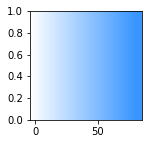

In [3]:
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mcolors.to_rgb(c1))
    c2=np.array(mcolors.to_rgb(c2))
    return mcolors.to_hex((1-mix)*c1 + mix*c2)

# Example with Liverpool
c1=big_six_cm['8560']['low']
c2=big_six_cm['8560']['high']
n=83

fig, ax = plt.subplots(figsize=(2, 2))
for x in range(n+1):
    ax.axvline(x, color=colorFader(c1,c2,x/n), linewidth=10) 
plt.show()

In [4]:
season = ["2020-2021", "2021-2022", "2022-2023"]

def setup_df(team, comp=None):
    dfs = []
    for i in range(len(season)):
        _df = pd.read_csv(f"/work/assets/fbref/teamStats/{team}/fixture{season[i]}.csv")
        dfs.append(_df)
    df = pd.concat(dfs)  
    df.dropna(subset=["Result"],inplace=True)
    if comp is not None:
        df = df[df["Comp"]==comp]
    df["TeamName"] = team
    df = df.sort_values(by='Date').reset_index(drop=True)
    return df

comp = "Champions Lg"
df_ba = setup_df("barcelona", comp) # Champions Lg / La Liga
df_rm = setup_df("real-madrid", comp)
df_am = setup_df("atletico-madrid", comp)
df_rs = setup_df("real-sociedad", "La Liga")
df_vi = setup_df("villarreal", "La Liga")
df_rb = setup_df("real-betis", "La Liga")
df_ab = setup_df("athletic-bilbao", "La Liga")
df_rv = setup_df("rayo-vallecano", "La Liga")
df_va = setup_df("valencia", "La Liga")
df_ca = setup_df("cadiz", "La Liga")
df_se = setup_df("sevilla", "La Liga")
df_ce = setup_df("celta-vigo", "La Liga")
df_vd = setup_df("valladolid", "La Liga")
df_al = setup_df("almeria", "La Liga")
df_el = setup_df("elche", "La Liga")
df_ge = setup_df("getafe", "La Liga")
df_gi = setup_df("girona", "La Liga")
df_os = setup_df("osasuna", "La Liga")
df_ma = setup_df("mallorca", "La Liga")

df = pd.concat([df_ba, df_rm, df_am, df_rs, df_vi, df_rb, df_ab, df_rv, df_va, df_ca, df_se, df_ce, df_al, df_el, df_ge, df_gi, df_os, df_ma, df_vd])

df[df["TeamName"]=="valladolid"]

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,xG,xGA,Poss,Attendance,Captain,Formation,Referee,Match Report,Notes,TeamName
0,0,2020-09-13,16:00,La Liga,Matchweek 1,Sun,Home,D,1.0,1.0,...,0.8,0.3,40.0,NaN,Javi Moyano,4-2-3-1,Mario Melero,Match Report,NaN,valladolid
1,1,2020-09-20,18:30,La Liga,Matchweek 2,Sun,Away,L,0.0,2.0,...,0.4,1.6,44.0,NaN,Javi Moyano,4-2-3-1,Santiago Jaime,Match Report,NaN,valladolid
2,2,2020-09-27,18:30,La Liga,Matchweek 3,Sun,Home,D,1.0,1.0,...,1.5,1.3,54.0,NaN,Nacho,4-4-2,José Sánchez,Match Report,NaN,valladolid
3,3,2020-09-30,21:30,La Liga,Matchweek 4,Wed,Away,L,0.0,1.0,...,0.6,2.3,38.0,NaN,Míchel,4-2-3-1,César Soto,Match Report,NaN,valladolid
4,4,2020-10-03,13:00,La Liga,Matchweek 5,Sat,Home,L,1.0,2.0,...,1.1,1.7,53.0,NaN,Nacho,4-4-2,Isidro Díaz de Mera,Match Report,NaN,valladolid
5,5,2020-10-18,18:30,La Liga,Matchweek 6,Sun,Away,D,2.0,2.0,...,1.0,1.1,34.0,NaN,Nacho,4-2-3-1,Jorge Figueroa,Match Report,NaN,valladolid
6,6,2020-10-25,14:00,La Liga,Matchweek 7,Sun,Home,L,0.0,2.0,...,0.3,2.5,45.0,NaN,Nacho,4-4-2,José Luis Munuera,Match Report,NaN,valladolid
7,7,2020-11-02,21:00,La Liga,Matchweek 8,Mon,Away,L,0.0,2.0,...,0.7,1.8,41.0,NaN,Míchel,4-2-3-1,Alberola Rojas,Match Report,NaN,valladolid
8,8,2020-11-08,18:30,La Liga,Matchweek 9,Sun,Home,W,2.0,1.0,...,2.1,1.7,30.0,NaN,Jordi Masip,4-4-2,César Soto,Match Report,NaN,valladolid
9,9,2020-11-22,18:30,La Liga,Matchweek 10,Sun,Away,W,3.0,1.0,...,1.3,1.5,40.0,NaN,Jordi Masip,4-4-2,David Medié,Match Report,NaN,valladolid


In [5]:
#Function to create xG rolling data
def get_xG_rolling_data(team_name, window=5, data=df):
    '''
    This function returns xG rolling average figures for a specific team.
    '''
    df = data.copy()
    df.dropna(subset=["Result"],inplace=True)
    df = df[df["TeamName"]==team_name]
    df['rolling_xG_for'] = df['xG'].rolling(window=window, min_periods=0).mean()
    df['rolling_xG_ag'] = df['xGA'].rolling(window=window, min_periods=0).mean()
    df['rolling_diff'] = df['rolling_xG_for'] - df['rolling_xG_ag']
    return df

In [6]:
get_xG_rolling_data("barcelona", 5)

,Unnamed: 0,Date,Time,Comp,Round,Day,Venue,Result,GF,GA,...,Attendance,Captain,Formation,Referee,Match Report,Notes,TeamName,rolling_xG_for,rolling_xG_ag,rolling_diff
0,4,2020-10-20,21:00,Champions Lg,Group stage,Tue,Home,W,5,1,...,NaN,Lionel Messi,4-2-3-1,Sandro Schärer,Match Report,NaN,barcelona,2.800000,1.300000,1.500
1,6,2020-10-28,21:00,Champions Lg,Group stage,Wed,Away,W,2,0,...,NaN,Lionel Messi,4-2-3-1,Danny Makkelie,Match Report,NaN,barcelona,2.550000,0.850000,1.700
2,8,2020-11-04,21:00,Champions Lg,Group stage,Wed,Home,W,2,1,...,NaN,Lionel Messi,4-2-3-1,Michael Oliver,Match Report,NaN,barcelona,2.866667,1.466667,1.400
3,11,2020-11-24,22:00,Champions Lg,Group stage,Tue,Away,W,4,0,...,NaN,Marc-André ter Stegen,4-2-3-1,Matej Jug,Match Report,NaN,barcelona,2.900000,1.175000,1.725
4,13,2020-12-02,21:00,Champions Lg,Group stage,Wed,Away,W,3,0,...,NaN,Sergio Busquets,4-2-3-1,Aliaksei Kulbakou,Match Report,NaN,barcelona,3.120000,1.100000,2.020
5,15,2020-12-08,21:00,Champions Lg,Group stage,Tue,Home,L,0,3,...,NaN,Lionel Messi,4-2-3-1,Tobias Stieler,Match Report,NaN,barcelona,2.740000,1.420000,1.320
6,34,2021-02-16,21:00,Champions Lg,Round of 16,Tue,Home,L,1,4,...,NaN,Lionel Messi,4-3-3,Björn Kuipers,Match Report,Leg 1 of 2,barcelona,2.600000,1.900000,0.700
7,40,2021-03-10,21:00,Champions Lg,Round of 16,Wed,Away,D,1,1,...,NaN,Lionel Messi,3-4-1-2,Anthony Taylor,Match Report,Leg 2 of 2; Paris S-G won,barcelona,2.340000,1.700000,0.640
8,3,2021-09-14,21:00,Champions Lg,Group stage,Tue,Home,L,0,3,...,39737.0,Sergio Busquets,3-1-4-2,Michael Oliver,Match Report,NaN,barcelona,1.780000,2.180000,-0.400
9,7,2021-09-29,20:00,Champions Lg,Group stage,Wed,Away,L,0,3,...,29454.0,Sergio Busquets,3-4-1-2,Daniele Orsato,Match Report,NaN,barcelona,1.220000,2.400000,-1.180


In [7]:
def get_xG_interpolated_df(team_name, window=10, data=df):
    # --- Get the xG rolling df
    df_xG = get_xG_rolling_data(team_name, window, data)
    # -- Create interpolated series
    df_xG['match_number'] = df_xG.index
    X_aux = df_xG.match_number.copy()
    X_aux.index = X_aux * 10 # 9 aux points in between each match
    last_idx = X_aux.index[-1] + 1
    X_aux = X_aux.reindex(range(last_idx))
    X_aux = X_aux.interpolate()
    # --- Aux series for the xG created (Y_for)
    Y_for_aux = df_xG.rolling_xG_for.copy()
    Y_for_aux.index = Y_for_aux.index * 10
    last_idx = Y_for_aux.index[-1] + 1
    Y_for_aux = Y_for_aux.reindex(range(last_idx))
    Y_for_aux = Y_for_aux.interpolate()
    # --- Aux series for the xG conceded (Y_ag)
    Y_ag_aux = df_xG.rolling_xG_ag.copy()
    Y_ag_aux.index = Y_ag_aux.index * 10
    last_idx = Y_ag_aux.index[-1] + 1
    Y_ag_aux = Y_ag_aux.reindex(range(last_idx))
    Y_ag_aux = Y_ag_aux.interpolate()
    # --- Aux series for the rolling difference in xG
    Z_diff_aux = df_xG.rolling_diff.copy()
    Z_diff_aux.index = Z_diff_aux.index * 10
    last_idx = Z_diff_aux.index[-1] + 1
    Z_diff_aux = Z_diff_aux.reindex(range(last_idx))
    Z_diff_aux = Z_diff_aux.interpolate()
    # -- Create the aux dataframe
    df_aux = pd.DataFrame({
        'X': X_aux,
        'Y_for': Y_for_aux,
        'Y_ag': Y_ag_aux,
        'Z': Z_diff_aux
    })
    return df_aux

In [8]:
get_xG_interpolated_df("barcelona").head()

,X,Y_for,Y_ag,Z
0,0.0,2.800,1.300,1.50
1,0.1,2.775,1.255,1.52
2,0.2,2.750,1.210,1.54
3,0.3,2.725,1.165,1.56
4,0.4,2.700,1.120,1.58


In [9]:
def plot_xG_gradient(ax, team_name, team_id, window=5, data=df):
    # -- Get the data
    df_xg = get_xG_rolling_data(team_name, window, data)
    df_aux_xg = get_xG_interpolated_df(team_name, window, data)
    # Specify the axes limits
    ax.set_ylim(0,3)
    ax.set_xlim(-0.5,df_xg.shape[0])
    ax.grid(ls=':', color='#333333')
    # -- Select the colors
    color_1 = big_six_cm[str(team_id)]['low']
    color_2 = big_six_cm[str(team_id)]['high']

    ax.plot(df_xg.index, df_xg['rolling_xG_for'], color=color_2,zorder=4)
    ax.plot(df_xg.index, df_xg['rolling_xG_ag'], color=color_1,zorder=4)
    # ax.fill_between(x=[-0.5,window], y1=ax.get_ylim()[0], y2=ax.get_ylim()[1], alpha=0.15, color='yellow', ec='None',zorder=2)
    # ax.axvline(x=window, ymin=ax.get_yticks().min(), ymax=ax.get_yticks().max(), color="gray")
    
    vmin = df_xg['rolling_diff'].min()
    vmax = df_xg['rolling_diff'].max()
    vmax = max(abs(vmin), abs(vmax))
    vmin = -1*vmax
    for i in range(0, len(df_aux_xg['X']) - 1):
        ax.fill_between(
            [df_aux_xg['X'].iloc[i], df_aux_xg['X'].iloc[i+1]],
            [df_aux_xg['Y_for'].iloc[i], df_aux_xg['Y_for'].iloc[i + 1]],
            [df_aux_xg['Y_ag'].iloc[i], df_aux_xg['Y_ag'].iloc[i + 1]],
            color=colorFader(color_1, color_2, mix=((df_aux_xg['Z'].iloc[i] - vmin)/(vmax - vmin))),
            zorder=3, alpha=0.3
        )
    for x in [38, 38*2, 38*3]:
        ax.plot([x,x],[ax.get_ylim()[0], ax.get_ylim()[1]], color='white', alpha=0.35, zorder=2, ls='--', lw=0.5)

    for x in [19, 57, 85]:
        if x == 19:
            text = "20/21"
        elif x == 57:
            text = '21/22'
        elif x == 85:
            text = "22/23"

## comp : Chanpions
#     for x in [len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")]), 
#               len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")])+len(df_xg[(df_xg["Date"]>"2021-09-01")&(df_xg["Date"]<"2022-06-20")]),
#               len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")])+len(df_xg[(df_xg["Date"]>"2021-09-01")&(df_xg["Date"]<"2022-06-20")])+len(df_xg[(df_xg["Date"]>"2022-09-01")&(df_xg["Date"]<"2023-06-20")])]:
#         ax.plot([x,x],[ax.get_ylim()[0], ax.get_ylim()[1]], color='white', alpha=0.35, zorder=2, ls='--', lw=0.5)
#     print(len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")])+len(df_xg[(df_xg["Date"]>"2021-09-01")&(df_xg["Date"]<"2022-06-20")]))
#     for x in [len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")]) - 2, 
#               len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")]) + len(df_xg[(df_xg["Date"]>"2021-09-01")&(df_xg["Date"]<"2022-06-20")])-2,
#               len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")]) + len(df_xg[(df_xg["Date"]>"2021-09-01")&(df_xg["Date"]<"2022-06-20")]) + len(df_xg[(df_xg["Date"]>"2022-09-01")&(df_xg["Date"]<"2023-06-20")])-2]:
#         if x == len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")])-2:
#             text = "20/21"
#         elif x == len(df_xg[(df_xg["Date"]>"2020-09-01")&(df_xg["Date"]<"2021-06-20")]) + len(df_xg[(df_xg["Date"]>"2021-09-01")&(df_xg["Date"]<"2022-06-20")])-2:
#             text = "21/22"
#         else:
#             text = "22/23"
        text_ = ax.annotate(
            xy=(x,2.75),
            text=text,
            color='#171733',
            size=7,
            va='center',
            ha='center',
            weight='bold',
            zorder=4
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground='white'), path_effects.Normal()]
        )
    return ax

<AxesSubplot:>

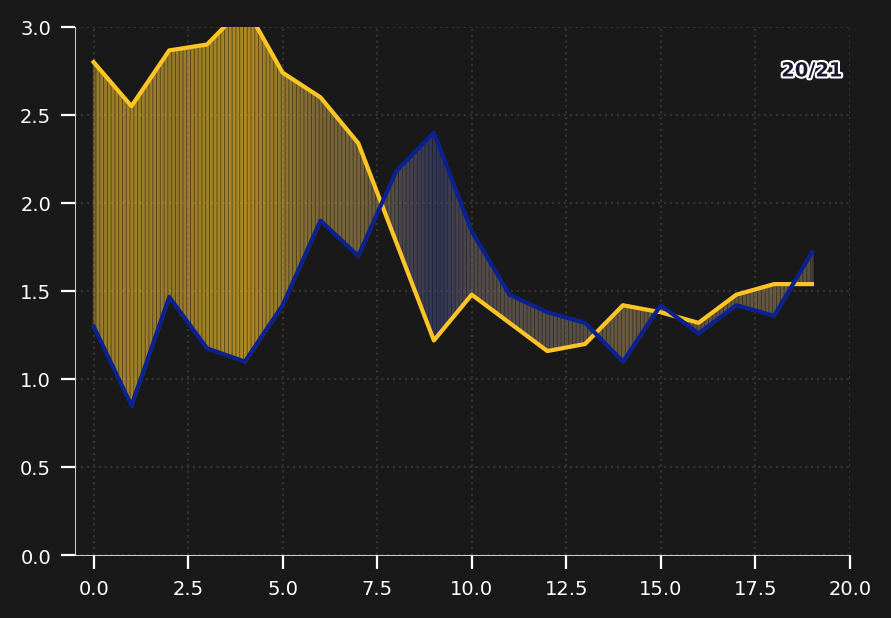

In [10]:
fig,ax = plt.subplots(figsize=(5,3.5), dpi=200)
fig.set_facecolor("#191919")
ax.set_facecolor("#191919")
ax.tick_params(colors="w", length=5, left=True, bottom=True, labelsize=7, labelbottom=True, labelleft=True)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color("#efefef")
ax.spines['bottom'].set_linewidth(.3)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color("#efefef")
ax.spines['left'].set_linewidth(.3)

plot_xG_gradient(ax, team_name="barcelona", team_id=8634, window=5)

In [11]:
spaceMono_bold = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
from mplsoccer import FontManager
monoBFont = FontManager(spaceMono_bold)

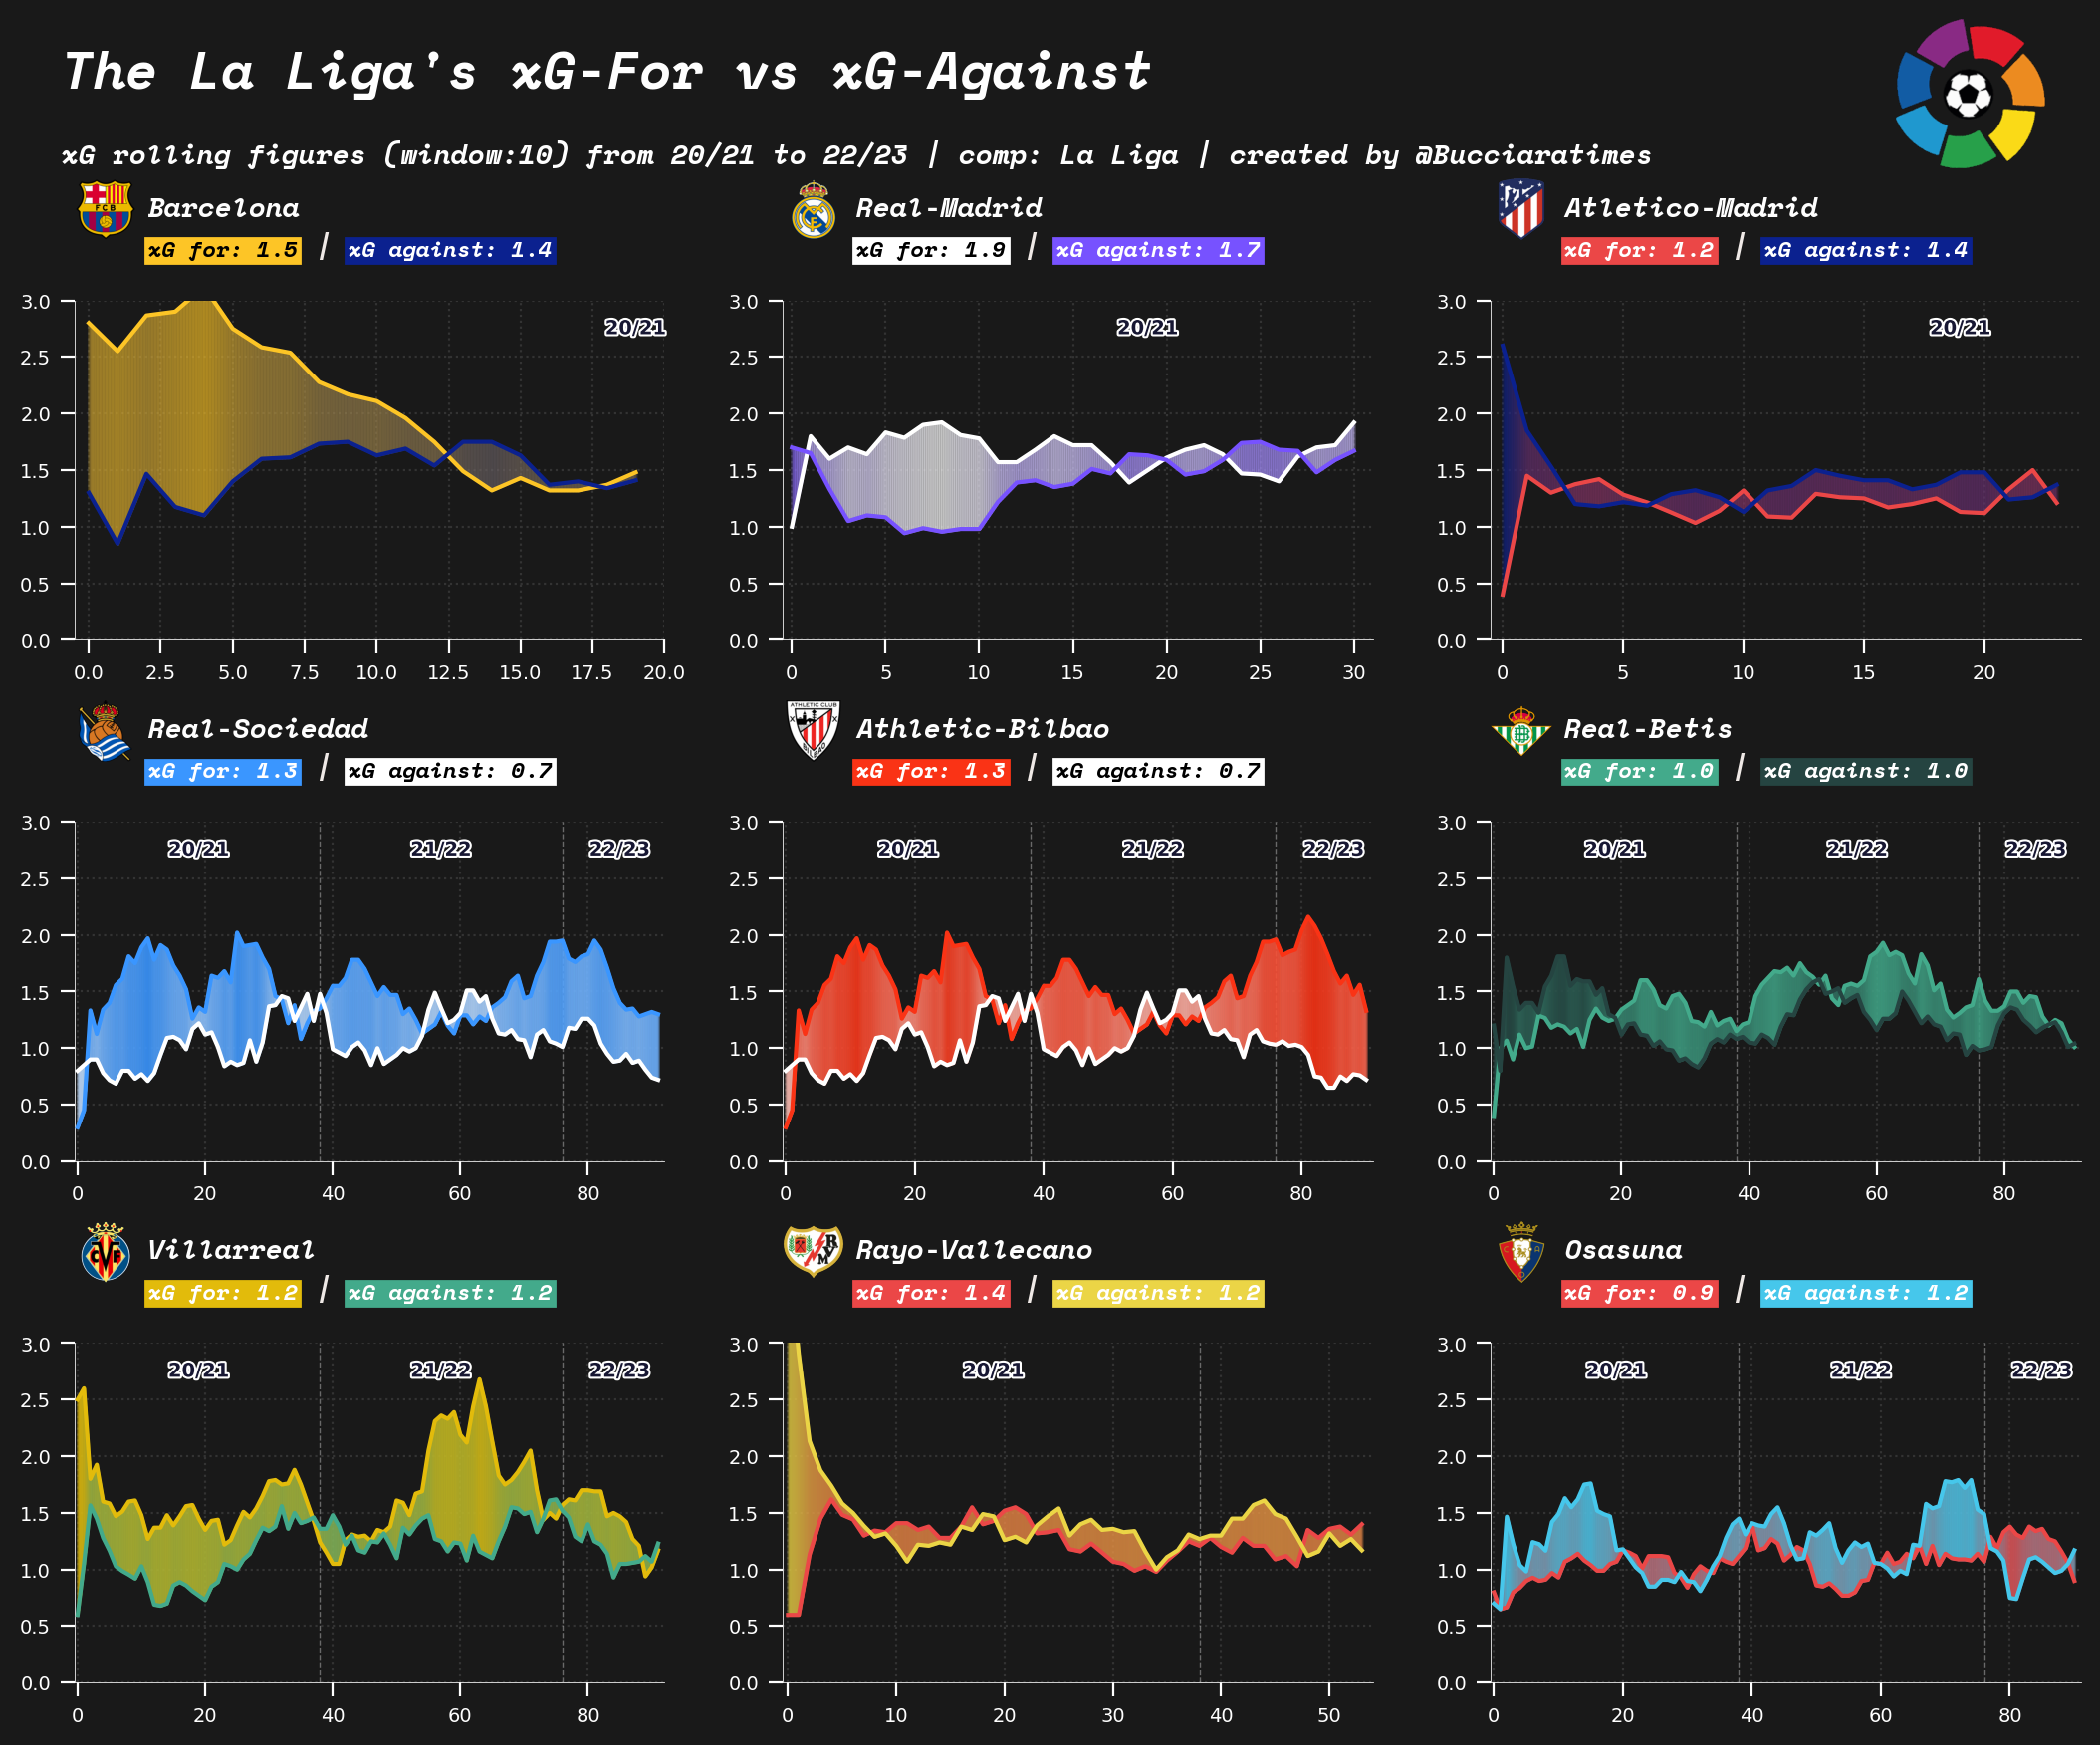

In [16]:
# ---- for path effects
def path_effect_stroke(**kwargs):
    return [path_effects.Stroke(**kwargs), path_effects.Normal()]

pe = path_effect_stroke(linewidth=1.5, foreground="black")
# ----
fig = plt.figure(figsize=(13, 10), dpi = 200)
fig.set_facecolor("#191919")
nrows = 6
ncols = 3
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios=[(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace=0.3
)

plot_counter = 0
logo_counter = 0
teamNames = [
    "barcelona", "real-madrid", "atletico-madrid", 
    "real-sociedad", 
    "athletic-bilbao", "real-betis", "villarreal", "rayo-vallecano", 
    "osasuna", "mallorca", "valencia", "getafe", "girona", "almeria",
    "valladolid", "celta-vigo", "sevilla", "cadiz", "elche", 
]
team_name_counter = 0
for row in range(nrows):
    for col in range(ncols):
        if row % 2 != 0:
            ax = plt.subplot(
                gspec[row, col],
                facecolor = "#191919"
            )
            ax.tick_params(colors="w", length=5, left=True, bottom=True, labelsize=7, labelbottom=True, labelleft=True)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_color("#efefef")
            ax.spines['bottom'].set_linewidth(.3)
            ax.spines['right'].set_visible(False)
            ax.spines['left'].set_color("#efefef")
            ax.spines['left'].set_linewidth(.3)
            teamId = list(big_six_cm.keys())[plot_counter]
            teamId = int(teamId)
            team_name = teamNames[plot_counter]
            plot_xG_gradient(ax, team_name, teamId, 10)           
            plot_counter += 1
        else:
            teamId = list(big_six_cm.keys())[logo_counter]
            color_1 = big_six_cm[str(teamId)]['low']
            color_2 = big_six_cm[str(teamId)]['high']
            # -- This was done manually cuz I'm lazy...
            if color_1 == '#FFFFFF':
                color_1_t = 'black'
            else:
                color_1_t = 'white'
                
            if color_2 == '#FFFFFF' or color_2 == "#fdc526":
                color_2_t = 'black'
            else:
                color_2_t = 'white'
            teamId = int(teamId)
            df_for_text = get_xG_rolling_data(teamNames[team_name_counter], 10)
            teamName = df_for_text['TeamName'].iloc[0]
            xG_for = df_for_text['rolling_xG_for'].iloc[-1]
            xG_ag = df_for_text['rolling_xG_ag'].iloc[-1]
            fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
            logo_ax = plt.subplot(
                gspec[row,col],
                anchor = 'NW', facecolor = '#EFE9E6'
            )
            club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{teamId:.0f}.png')).convert('RGBA')
            logo_ax.imshow(club_icon)
            logo_ax.axis('off')
            
            # -- Add the team name
            ax_text(
                x = 1.2, 
                y = 0.7,
                s = f'<{teamName.title()}>\n<xG for: {xG_for:.1f}> <|> <xG against: {xG_ag:.1f}>',
                color="#fefefe",
                ax = logo_ax, 
                highlight_textprops=[
                   {'weight':'bold', 'fontproperties':monoBFont.prop},
                   {'size':'8', 'bbox': {'edgecolor': color_2, 'facecolor': color_2, 'pad': 1}, 'color': color_2_t}, 
                   {'color':'#EFE9E6'},
                   {'size':'8', 'bbox': {'edgecolor': color_1, 'facecolor': color_1, 'pad': 1}, 'color': color_1_t}
                ],
                fontproperties=monoBFont.prop,
                ha = 'left', 
                size = 10, 
                annotationbbox_kw = {'xycoords':'axes fraction'}
            )
            
            logo_counter += 1
            team_name_counter += 1
            if team_name_counter == len(teamNames):
                break

fig_text(
    x=0.12, y=.92, 
    s='The La Liga\'s xG-For vs xG-Against',
    va='bottom', ha='left',
    fontsize=19, color='#fefefe', fontproperties=monoBFont.prop, fontweight='bold'
)
fig_text(
	x=0.12, y=.885, 
    s='xG rolling figures (window:10) from 20/21 to 22/23 | comp: La Liga | created by @Bucciaratimes',
	va='bottom', ha='left',
	fontsize=10, color='#fefefe', fontproperties=monoBFont.prop
)
fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.82, .885, .075, .075]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{87:.0f}.png')).convert('RGBA') # 白黒：LA
logo_ax.imshow(club_icon)
logo_ax.axis('off')
import random

# plt.savefig(f'/work/output/{random.uniform(100,1000)}.png', dpi=250, bbox_inches="tight",facecolor="#191919")

In [ ]:
fig = plt.figure(figsize=(13, 10), dpi = 200)
nrows = 6
ncols = 3
gspec = gridspec.GridSpec(
    ncols=ncols, nrows=nrows, figure=fig, 
    height_ratios=[(1/nrows)*2.35 if x % 2 != 0 else (1/nrows)/2.35 for x in range(nrows)], hspace=0.3
)

fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/'
logo_ax = fig.add_axes(
    [.82, .885, .055, .055]
)
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{47:.0f}.png')).convert('LA')
logo_ax.imshow(club_icon)
logo_ax.axis('off')